# 1. MSI image segmentation

### 1a. This step enables you to segment your MSI image across all m/z values. Prior to doing this, Gaussian spectral smoothing and baseline subtraction will be performed.

*Lines to update:*

*4.) Filename: Update with the path to your .imzML file*

*5.) Output directory: Update with the path to your output directory*

*6.) Same name: Update with your sample name*

In [6]:
filename = r"example_data\prostate_example.imzML"
output_directory = r"D:\Manuscripts\2024_MSIight\rebuttal\new_version_output_test"
sample_name = 'R0008'

#### Option 1 (Quickest, least accurate): Manual setting. Here you can set the t-SNE parameters manually with no score or quality control

*All lines below can optionally be updated based on dataset*

In [7]:
###Advanced parameters###
sigma = 2 
structuring_element_size = 10
pca_components = 100
tsne_components = 2
tsne_verbose = 0
tsne_perplexity = 41
tsne_interations = 1349
tsne_learning_rate = 462
k_means_cluster_number = 8 #8

C:\Users\lawashburn\Anaconda3\lib\site-packages\pyimzml\ontology\ontology.py:92: UserWarning: Accession IMS:1000046 found with incorrect name "pixel size x". Updating name to "pixel size (x)".
  warn(
C:\Users\lawashburn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lawashburn\Documents\IMSight\v0.0.3\notebooks\MSIght_Jupyter\refactor_segment.py:40: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.scatterplot(


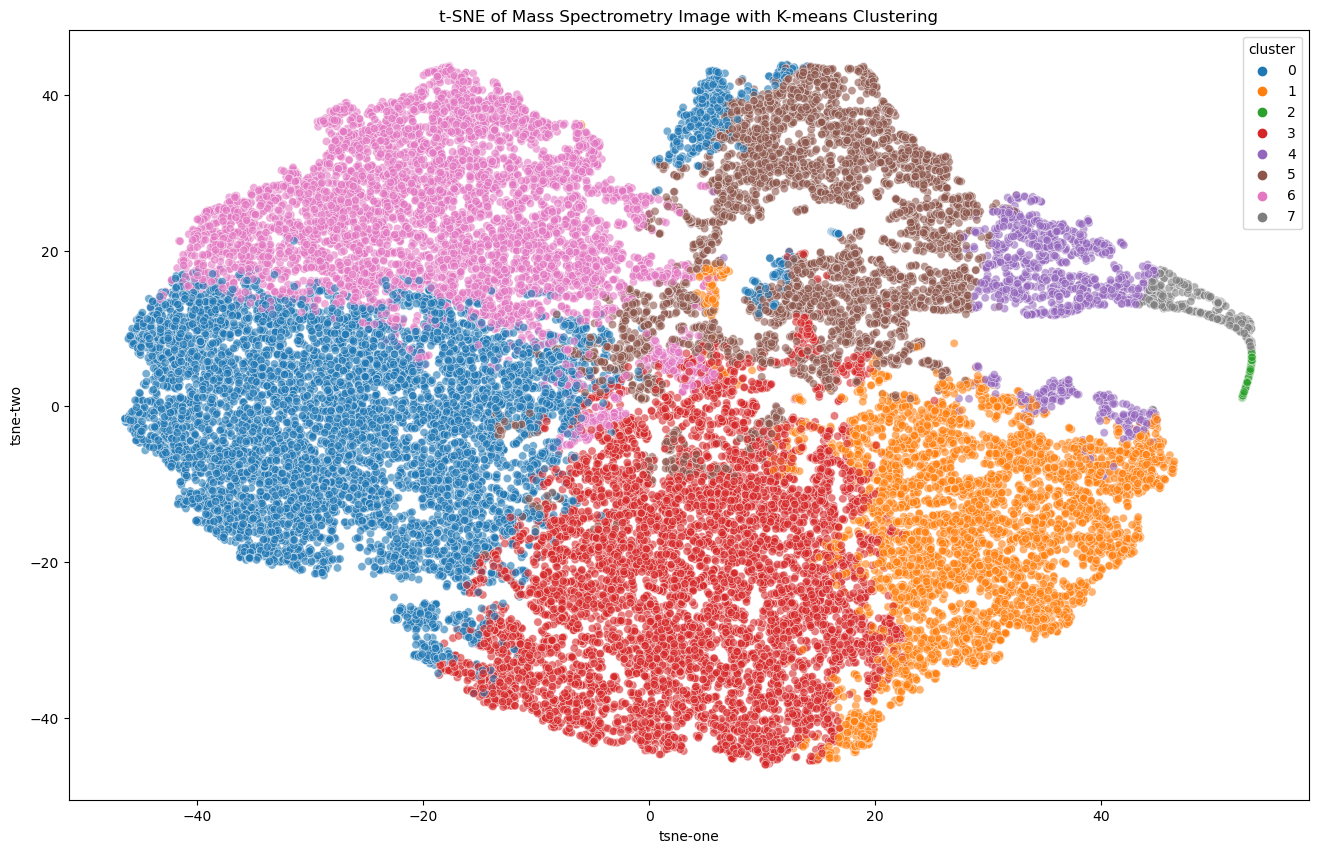

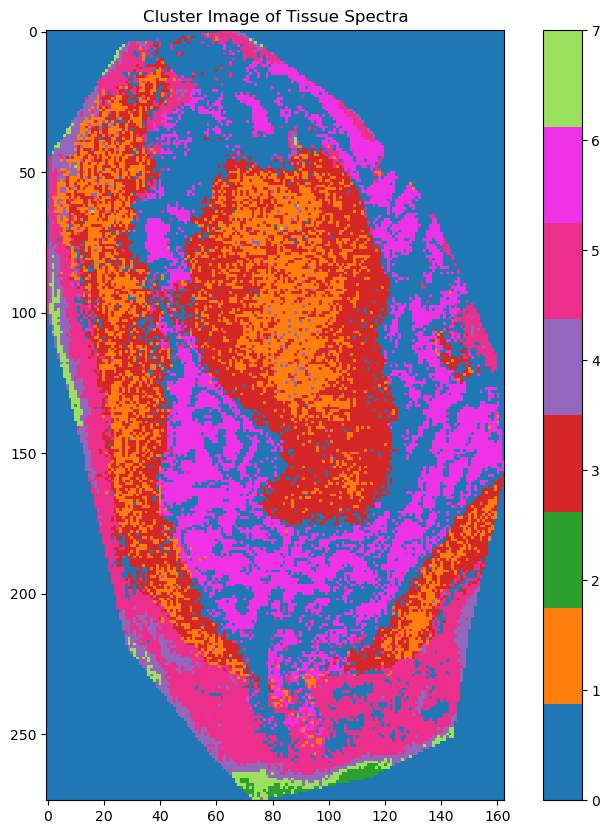

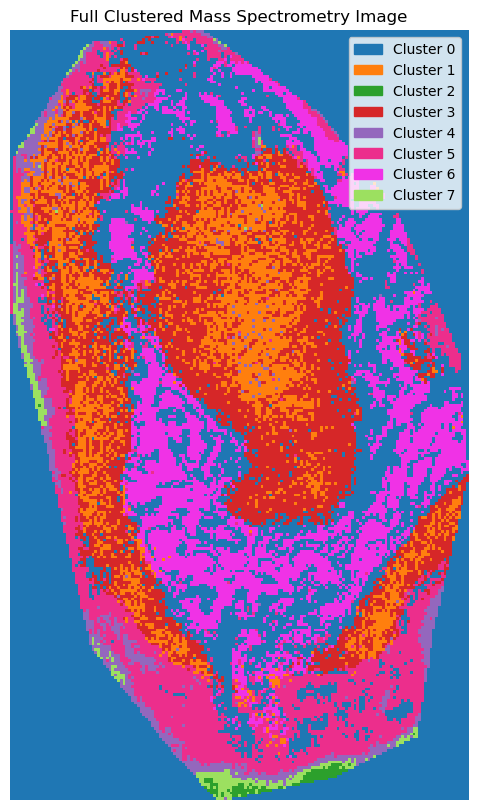

In [8]:
from MSIght_Jupyter.refactor_segment import cluster_msi
unfiltered_cluster_results,width,height,cluster_colors,cluster_image_full,cmap,legend_handles_full,tsne_result = cluster_msi(filename,output_directory,sample_name,sigma,structuring_element_size,pca_components,
           tsne_components,tsne_perplexity,tsne_learning_rate,tsne_interations,k_means_cluster_number)

### 1b. Based on results from the above step, select clusters to remove that do not correspond to the tissue area.

#### Confirm that the new image looks ideal. If not, adjust the clusters removed

*Lines to update:*

*3.) List of clusters to remove*

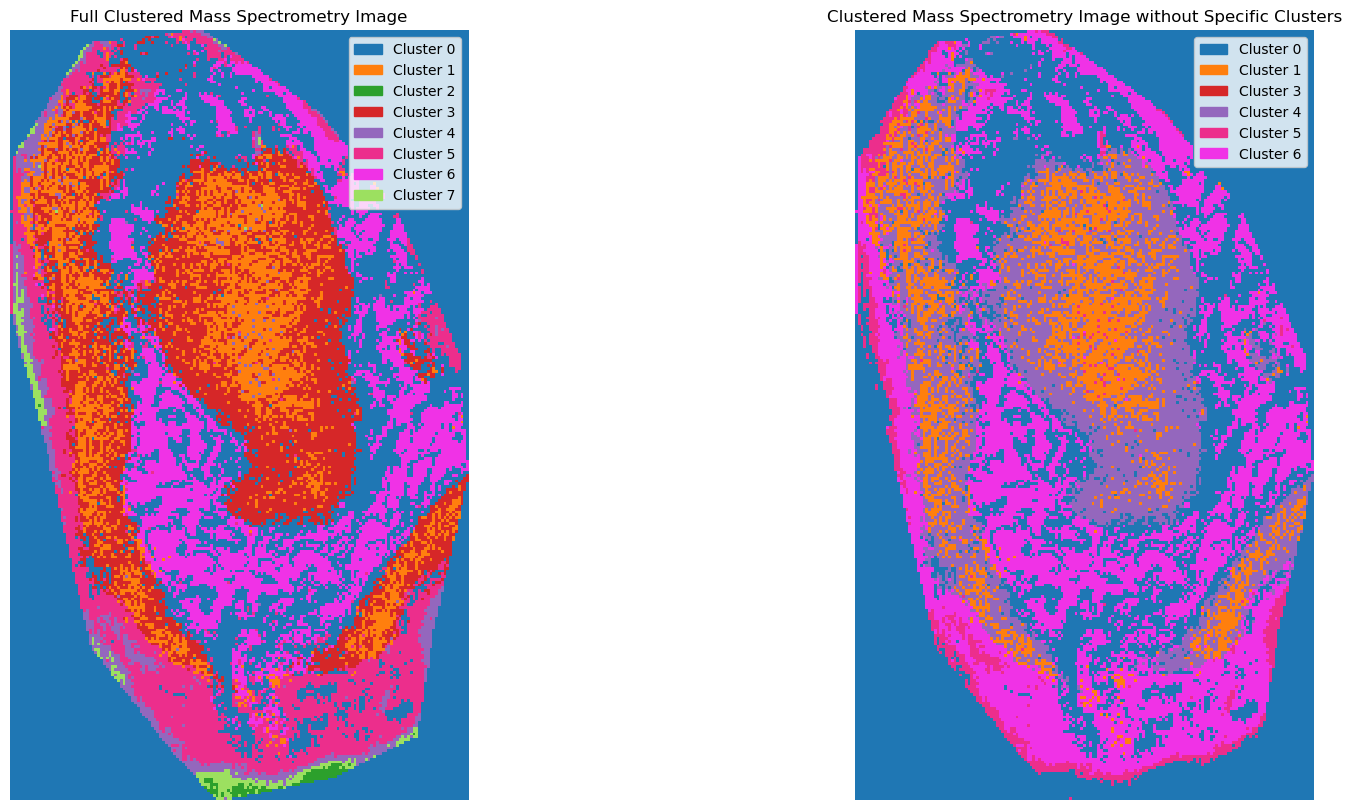

In [9]:
from MSIght_Jupyter.refactor_segment import cluster_removal

clusters_to_remove = [2,7]
filtered_cluster_results = cluster_removal(unfiltered_cluster_results,width,height,cluster_colors,cluster_image_full,
                                           cmap,legend_handles_full,clusters_to_remove,output_directory,sample_name)

### 1c. Using segmented coordinates, generate composite image of all m/z

#### Adjust threshold value as necessary

*Lines to update:*

*4.) Threshold*

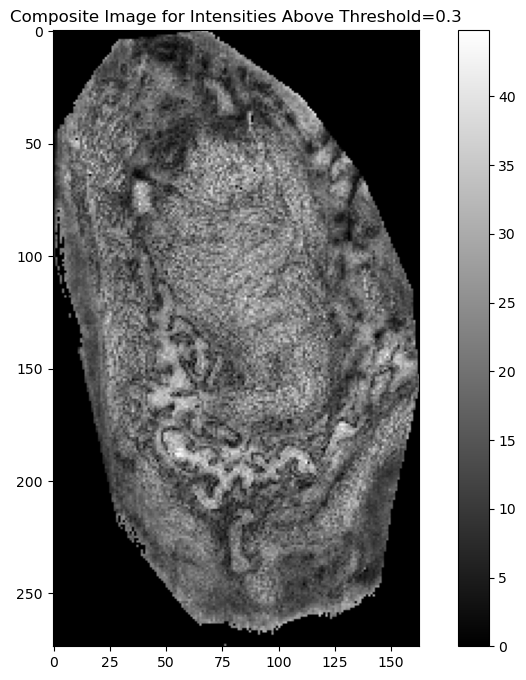

In [10]:
from MSIght_Jupyter.refactor_segment import make_composite_image

threshold = 0.3
full_composite_image = make_composite_image(filtered_cluster_results,threshold,output_directory,sample_name)

### 1d. Segment composite image

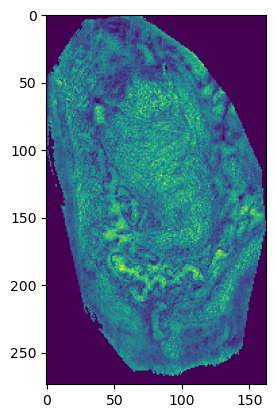

In [11]:
from MSIght_Jupyter.refactor_segment import composite_wo_selected_clusters

segmented_image = composite_wo_selected_clusters(unfiltered_cluster_results,clusters_to_remove,full_composite_image,output_directory,sample_name)

*Lines to update:*

*3.) Median filter size*

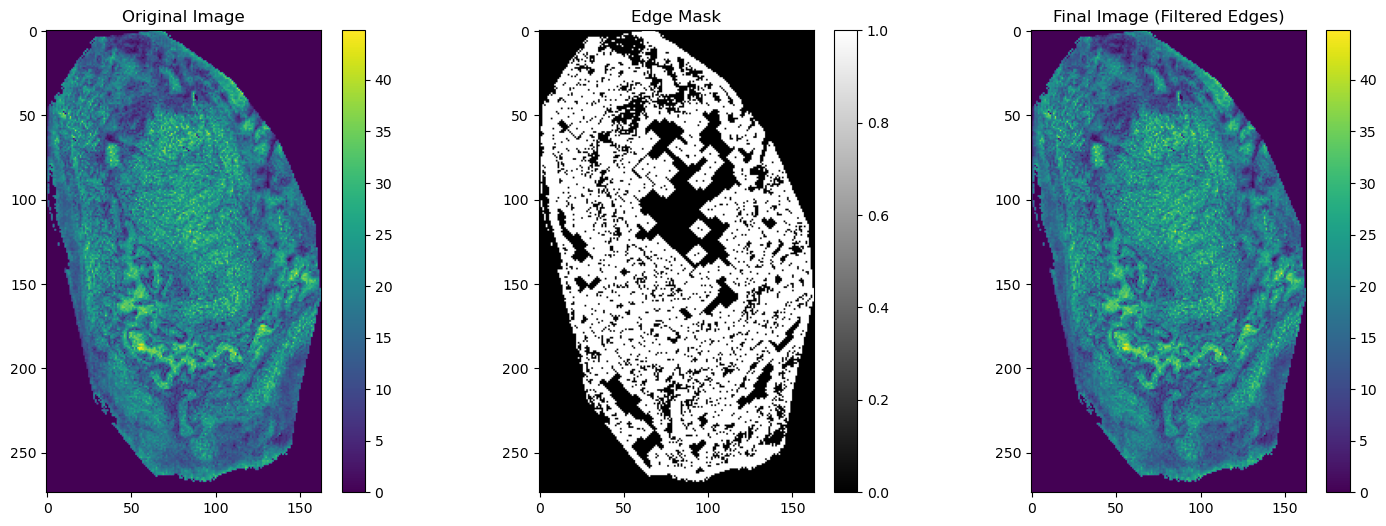

In [12]:
from MSIght_Jupyter.refactor_segment import remove_residual_noise

median_filter_size = 1
final_MSI_image = remove_residual_noise(segmented_image,median_filter_size,output_directory,sample_name)

# 2. H&E Image Processing
### Adjust threshold value as needed

*Lines to update:*

*4.) Path to H&E image in .TIF format*

*6.) Sample name*

*7.) Path to output directory*

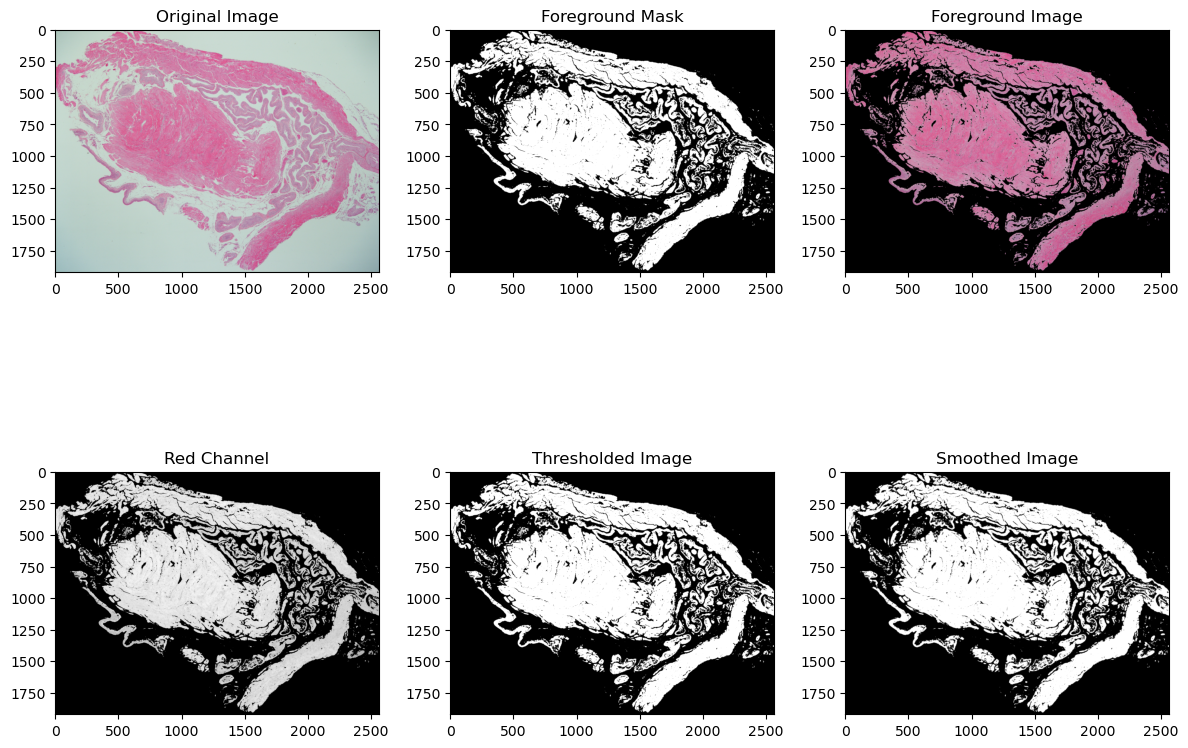

In [13]:
from MSIght_Jupyter.refactor_histology_preprocess import preprocess_he

image_path = 'example_data\prostate_he_example.tif'
threshold_value = 128
sample_name = 'R0008_norm_centroid'
output_directory = r"D:\Manuscripts\2024_MSIight\rebuttal\new_version_output_test"

final_he_image = preprocess_he(image_path,threshold_value,sample_name,output_directory)

# 3. Rotate MSI image to match the H&E orientation
### Here is a comparison of both images:

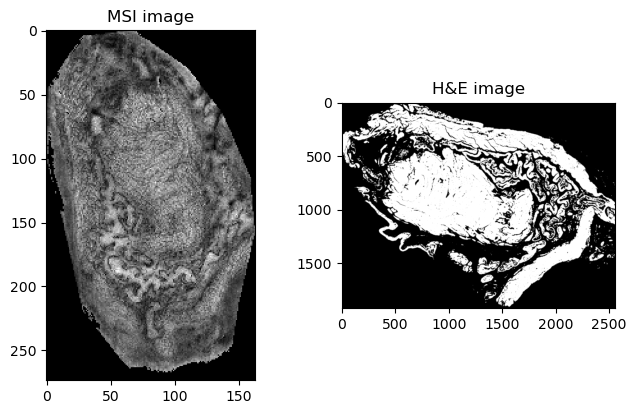

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
plt.subplot(2, 3, 1)
plt.title('MSI image')
plt.imshow(final_MSI_image, cmap='gray')

plt.subplot(2, 3, 2)
plt.title('H&E image')
plt.imshow(final_he_image, cmap='gray')

### 3a. Run this cell enough times to get in the proper orientation (rotates 90 degrees each time):

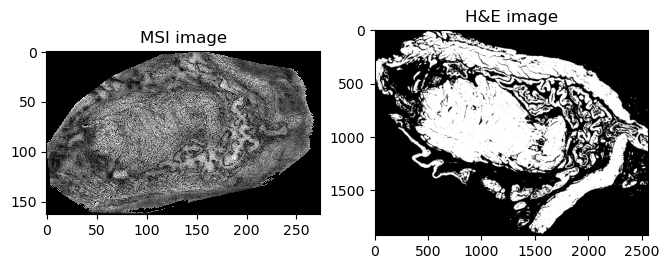

In [15]:
import numpy as np
final_MSI_image = np.rot90(final_MSI_image)

plt.figure(figsize=(12, 10))
plt.subplot(2, 3, 1)
plt.title('MSI image')
plt.imshow(final_MSI_image, cmap='gray')

plt.subplot(2, 3, 2)
plt.title('H&E image')
plt.imshow(final_he_image, cmap='gray')

### 3b. Run this cell to flip the image horizontally (up/down):

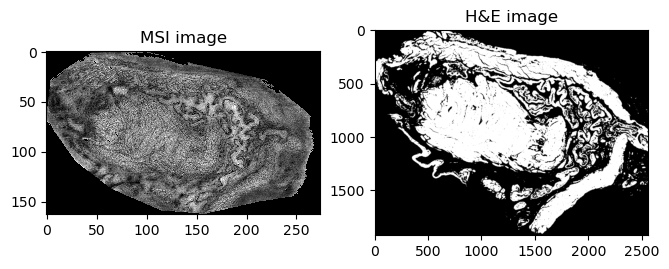

In [16]:
import numpy as np
final_MSI_image = np.flipud(final_MSI_image)

plt.figure(figsize=(12, 10))
plt.subplot(2, 3, 1)
plt.title('MSI image')
plt.imshow(final_MSI_image, cmap='gray')

plt.subplot(2, 3, 2)
plt.title('H&E image')
plt.imshow(final_he_image, cmap='gray')

### 3c. Run this cell to flip the image vertically (left/right):

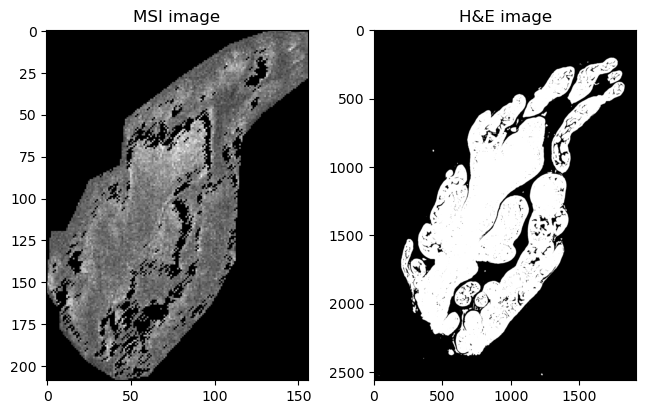

In [13]:
import numpy as np
final_MSI_image = np.fliplr(final_MSI_image)

plt.figure(figsize=(12, 10))
plt.subplot(2, 3, 1)
plt.title('MSI image')
plt.imshow(final_MSI_image, cmap='gray')

plt.subplot(2, 3, 2)
plt.title('H&E image')
plt.imshow(final_he_image, cmap='gray')

# 4. Interpolate MSI image

### Option 1: Linear interpolation (default)

*Lines to update:*

*4.) Path to H&E image in .TIF format*

*5.) Path to MSI file in .imzML format*

*6.) Sample name*

*7.) Path to output directory*

C:\Users\lawashburn\Anaconda3\lib\site-packages\pyimzml\ontology\ontology.py:92: UserWarning: Accession IMS:1000046 found with incorrect name "pixel size x". Updating name to "pixel size (x)".
  warn(


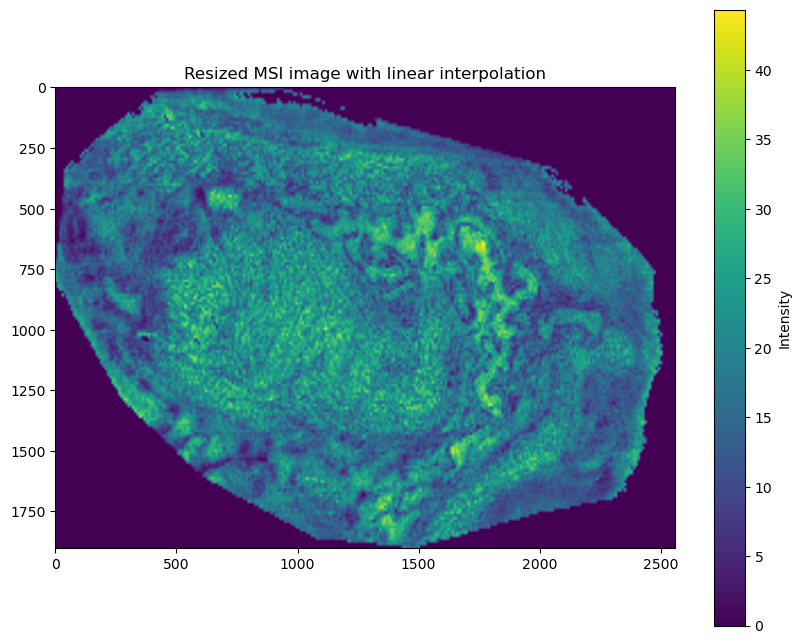

In [17]:
from MSIght_Jupyter.refactor_interpolation import interpolate_MSI

image_path = 'example_data\prostate_he_example.tif'
filename = 'example_data\prostate_example.imzML'
sample_name = 'R0008_norm_centroid'
output_directory = r"D:\Manuscripts\2024_MSIight\rebuttal\new_version_output_test"

sized_he_image,interpolated_MSI_image = interpolate_MSI(filename,image_path,final_MSI_image,final_he_image,output_directory,sample_name)

# 5. Affine transform images

### Option 1: Perform automated affine transformation

*Lines to update:*

*4.) MSI threshold value*

*5.) H&E threshold value*

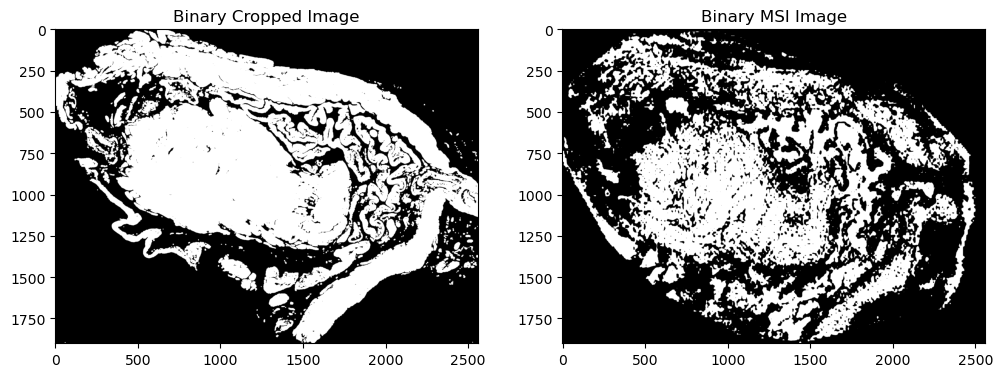

SSD without optimization (original overlap): 1577390.0
SSD after phase cross-correlation: 2003877.0
SSD after optimization: 1364996.2351368163


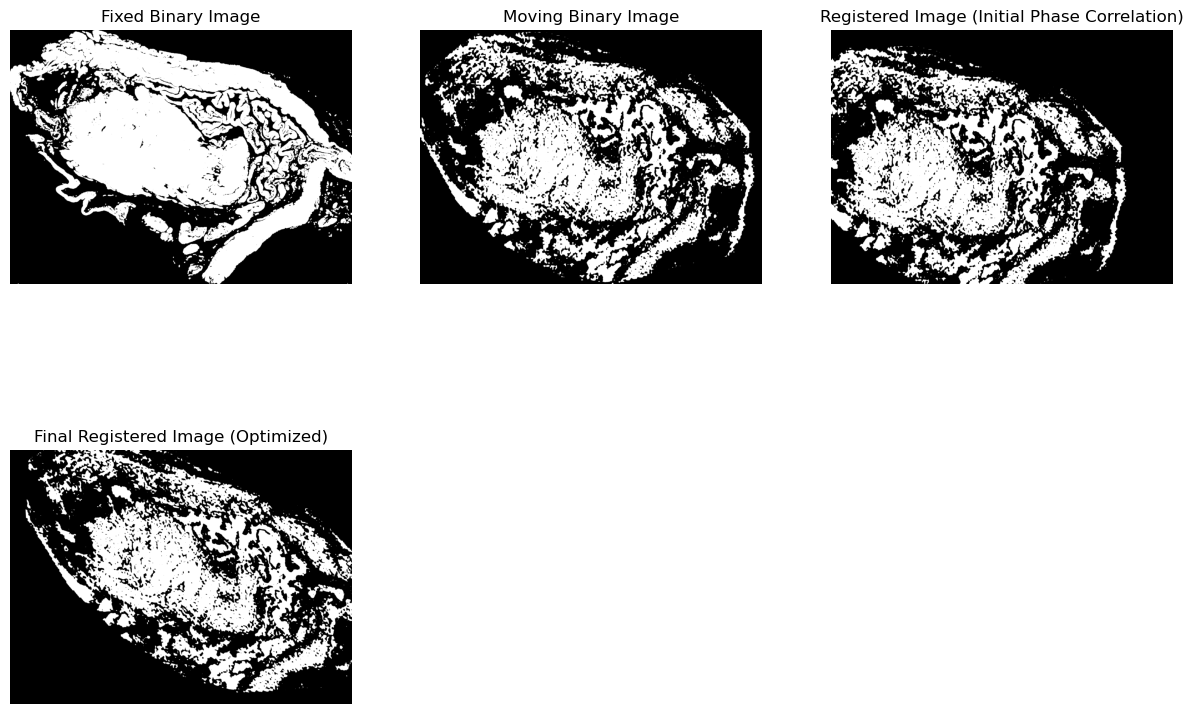

In [19]:
from MSIght_Jupyter.refactor_affine_transform import register_he_msi

msi_threshold = 18
he_threshold = 0.3

affine_matrix,transformed_ms_image = register_he_msi(sized_he_image,interpolated_MSI_image,msi_threshold,he_threshold,output_directory,sample_name)

### Apply B-spline

*Lines to update:*

*4.) Numer of histograms*

*5.) Gradient tolerance*

*6.) Optimizer iterations*

*7.) Coarseness*

In [ ]:
from MSIght_Jupyter.refactor_bspline import perform_bspline

number_histograms = 75 #50
gradient_tolerance = 1e-5 #1e-5
optimizer_iterations = 20 #100
courseness = 10 #50

b_spline_apply = perform_bspline(sized_he_image,transformed_ms_image,number_histograms,gradient_tolerance,optimizer_iterations,courseness)

# Utility #1: Combine LC-MS/MS, MSI, and H&E data- Protein-wise

### This example is for if a specific protein or set of proteins are the target (based on UniProt ID)

*Lines to update:*

*1.) Path to MSFragger output file directory*

*3.) Proteins of interest*

*4.) MSI ppm error*

In [21]:
fragger_output_path = 'example_data\MSFragger_output'
output_path = r"D:\Manuscripts\2024_MSIight\rebuttal\new_version_output_test"
psm_path = output_path + '\\psm.tsv'
protein_oi_list = ['P28481','P08121']
ppm_error = 50

from MSIght_Jupyter.refactor_fragger_process import process_fragger
fragger_results_formatted = process_fragger(protein_oi_list,ppm_error,psm_path,sized_he_image,output_path)

from MSIght_Jupyter.refactor_he_lcmsms_msi_merge import merge_all_results
merge_all_results(output_directory,sample_name,fragger_results_formatted,filename,sized_he_image,b_spline_apply)

C:\Users\lawashburn\Anaconda3\lib\site-packages\pyimzml\ontology\ontology.py:92: UserWarning:

Accession IMS:1000046 found with incorrect name "pixel size x". Updating name to "pixel size (x)".



<Figure size 640x480 with 0 Axes>